In [3]:
import pandas as pd 
import matplotlib as plt
import os
import psycopg2
os.chdir(' .. ')
#from src.connection import PostgresConnection
#from src.utils import missing_values_table, convert_bytes_to_megabytes

In [76]:
import sys
import os
sys.path.append(os.path.abspath( '../src'))

In [77]:
# Assuming db.execute_query returns None if the query fails
query = "SELECT . FROM xdr_data"
result = db.execute_query(query)

if result is None:
    print("Query execution failed or returned no results.")
else:
    df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
    print(df.head()) # Display the first few rows of the DataFrame

# Close the connection when done

NameError: name 'db' is not defined

In [4]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore

def missing_values_table(df):

  mis_val = df.isnull().sum()

  # Percantage of missing Ngtuee
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  mis_val_dtype = df.dtypes

  mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

  #Nenemy the colwwne
  mis_val_table_ren_columns = mis_val_table.renamm(
  columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

  mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
         '% of Total Values', ascending=False).round(1)
  
  print("Your selected Dataframe has" + str(df.shape[1]) + "columns.\n"
        "There are" + str(mis_val_table_ren_columns.shape[0]) + 
        "columns that have missing values.")
  

  return mis_val_table_ren_columns



def convert_bytes_to_megabytes(df, bytes_data):
  megabyte = 1 * 10e+5
  df[bytes_data] = df[bytes_data] / megabyte

  return df[bytes_data]

def fix_outlier(df, column):
  df[column]=np.where(df[column]> df[column].quantile(0.95), df[column].median(),df[column])
  return df[column]

def remove_outliers(df, column_to_process, z_threshold=3):
   # Apoly outcter remowel pa the spuctried cotumn
   z_scores = zscore(df[column_to_process])
   outlier_column = column_to_process + '_Outlier'
   df[outlier_column]=(np.abs(z_scores) > z_threshold).astype(int)
   df = df[df[outlier_column] == 0] # Keep rons without outliers

   # Drop the outlier column as it's no Langer needed
   df = df.drop(columns=[outlier_column], errors='ignore')

   return df

In [10]:
class PostgresConnection:
  def __init__ (self, dbname, user, password, host='localhost', port='5432'):
    self.dbname = dbname
    self.user = user
    self.password = password
    self.host = host
    self.port = port
    self.conn = None
    self.cursor = None

  def connect(self):
    try:
       self.conn = psycopg2.connect(
          dbname=self.dbname,
          user=self.user,
          password=self.password,
          host=self.host,
          port=self.port
       )
       self.cursor = self.conn.cursor()
       print("Connected to PostgreSQL database!")
    except Exception as e:
       print(f"Error: {e}")

  def execute_query(self, query):
   try:
      self.cursor.execute(query)
      rows = self.cursor.fetchall()
      return rows
   except Exception as e:
      print(f"Error executing query: {e}")
      return None

  def close_connextion(self):
   if self.conn is not None:
      self.conn.close()
      print("Connection closed.")


In [13]:
# Assuming db.execute_query returns None if the query fails
query = "SELECT . FROM xdr_data"
result = db.execute_query(query)

if result is None:
    print("Query execution failed or returned no results.")
else:
    df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
    print(df.head()) # Display the first few rows of the DataFrame

# Close the connection when done


Error executing query: 'NoneType' object has no attribute 'execute'
Query execution failed or returned no results.


In [14]:
db = PostgresConnection(dbname='teleco', user='postgres', password='root')
db.connect()

# ExampLe query
query = "SELECT . FROM xdr_data"
result = db.execute_query(query)

# Convert the result to Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head()) # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()

Error: connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?

Error executing query: 'NoneType' object has no attribute 'execute'


AttributeError: 'NoneType' object has no attribute 'description'

In [ ]:
missing_values_df = missing_values_table(df)
print("Missing values df:")

In [ ]:
df['x'] = convert_bytes_to_megabytes(df,'HTTPS to DP')

# Identifying the top 10 handsets used by the customers

In [2]:
import pandas as pd
import matplotlib as plt


In [3]:
# Load dataset
df = pd.read_csv('Week1_challenge_data_source(CSV).csv')

In [5]:
df.count()

Bearer Id                                   149010
Start                                       150000
Start ms                                    150000
End                                         150000
End ms                                      150000
Dur. (ms)                                   150000
IMSI                                        149431
MSISDN/Number                               148935
IMEI                                        149429
Last Location Name                          148848
Avg RTT DL (ms)                             122172
Avg RTT UL (ms)                             122189
Avg Bearer TP DL (kbps)                     150000
Avg Bearer TP UL (kbps)                     150000
TCP DL Retrans. Vol (Bytes)                  61855
TCP UL Retrans. Vol (Bytes)                  53352
DL TP < 50 Kbps (%)                         149247
50 Kbps < DL TP < 250 Kbps (%)              149247
250 Kbps < DL TP < 1 Mbps (%)               149247
DL TP > 1 Mbps (%)             

In [6]:
handset_counts = df['Handset Type'].value_counts()

In [7]:
top_10_handsets = handset_counts.head(10)

In [8]:
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


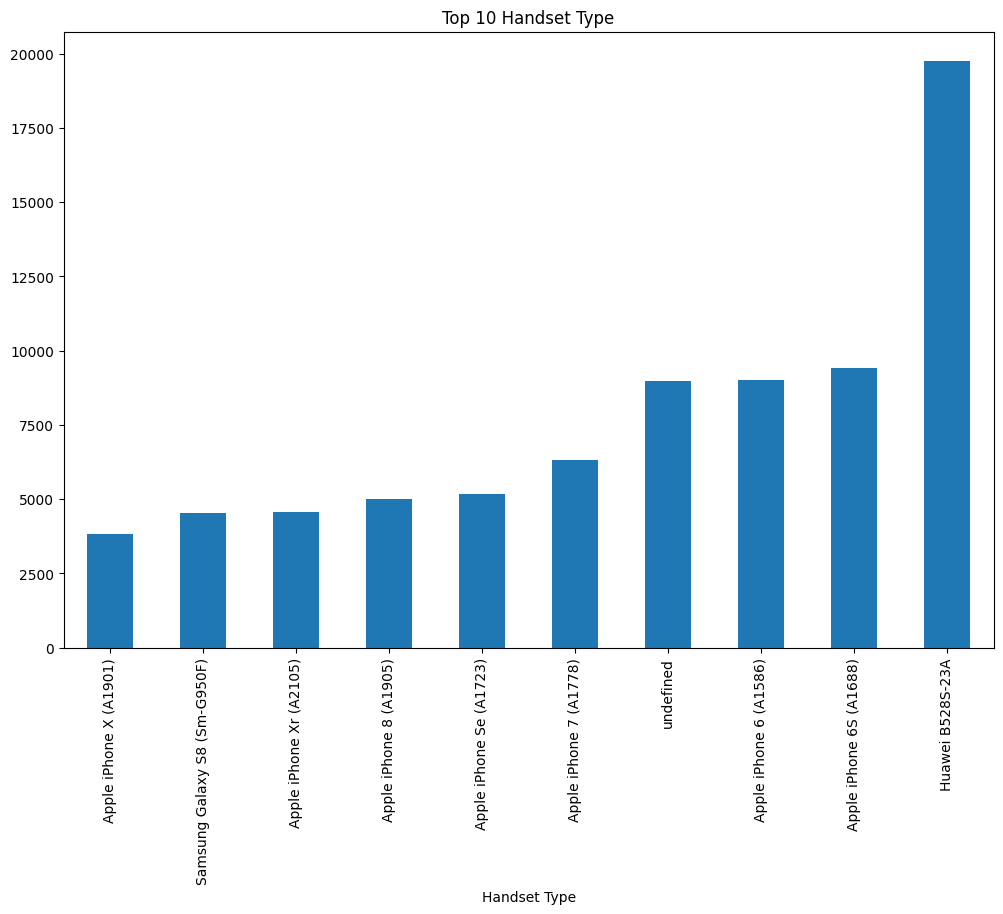

In [27]:
import matplotlib.pyplot as plt 

# Assuming top_10_handsets is a pandas DataFrame or Series
plt.figure(figsize=(12, 8))
top_10_handsets.plot(kind='bar', title='Top 10 Handset Type')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show() 

# Identify the top 3 handset manufacturers

In [23]:
handset_manufacturers_counts = df['Handset Manufacturer'].value_counts()

In [24]:
top_3_manufacturers = handset_manufacturers_counts.head(3)

In [25]:
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


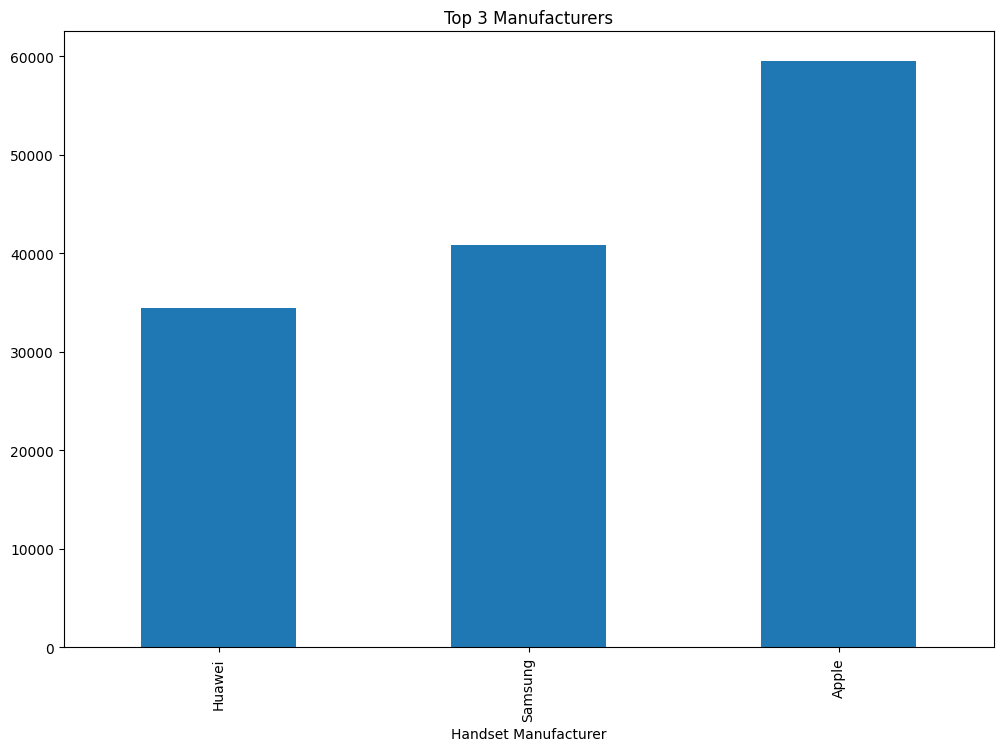

In [26]:
import matplotlib.pyplot as plt 

# Assuming top_10_handsets is a pandas DataFrame or Series
plt.figure(figsize=(12, 8))
top_3_manufacturers.plot(kind='bar', title='Top 3 Manufacturers')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show() 

# Identify the top 5 handsets per top 3 handset manufacturer

In [15]:
df

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082022e+14   3.365069e+10  3.548311e+13   
149997    97970.0  2.082019e+14   3.366345e+10  3.566051e+13   
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   
149999    97910.0  2.082021e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...        1.585461e+07        2.501332e+06   
1                     L77566A  ...        2.024740e+07        1.911173e+07   
2                     D42335A  ...        1.972566e+07        1.469958e+07   
3                     T21824A  ...        2.138812e+07        1.514664e+07   
4                     D88865A  ...        1.525938e+07        1.896287e+07   
...                       ...  ...                 ...                 ...   
149996                D20434A  ...        1.619167e+07        1.176343e+07   
149997                D10223C  ...        1.387723e+07        8.288284e+06   
149998                T51102A  ...        2.266051e+07        1.855903e+06   
149999                L88342B  ...        8.817106e+06        8.305402e+06   
150000                    NaN  ...        1.163407e+07        1.100941e+07   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8.198936e+06        9.656251e+06       2.780823e+08   
1             1.833841e+07        1.722713e+07       6.087501e+08   
2             1.758779e+07        6.163408e+06       2.295846e+08   
3             1.399465e+07        1.097942e+06       7.995382e+08   
4             1.712458e+07        4.152180e+05       5.277072e+08   
...                    ...                 ...                ...   
149996        1.788370e+07        1.967816e+07       5.266097e+08   
149997        1.935015e+07        2.129315e+07       6.268931e+08   
149998        9.963942e+06        5.065760e+06       5.535395e+08   
149999        3.322253e+06        1.317259e+07       3.525370e+08   
150000        1.162685e+07        1.100175e+07       4.220447e+08   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07      1.717444e+08      8.814393e+06   
1            1.170709e+06      5.269042e+08      1.505514e+07   
2            3.956300e+05      4.106926e+08      4.215763e+06   
3            1.084972e+07      7.490399e+08      1.279728e+07   
4            3.529801e+06      5.507095e+08      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06      3.264510e+06      1.348742e+07   
149997       4.735033e+06      7.121804e+08

In [28]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

In [29]:
filtered_df = df[df['Handset Manufacturer'].isin(top_3_manufacturers)]

In [30]:
top_handsets_per_manufacturer = filtered_df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

In [31]:
print(top_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

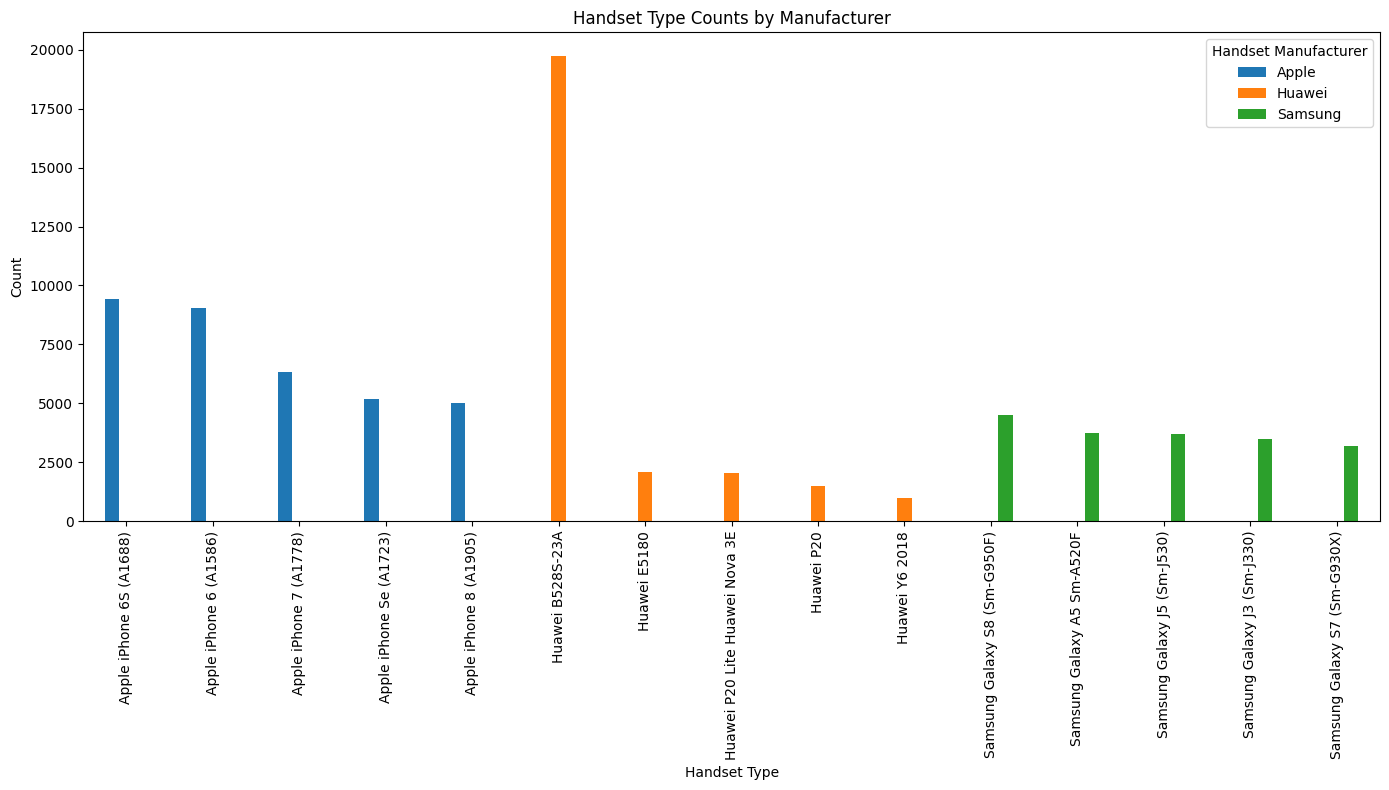

In [33]:
# Plotting the data
top_handsets_per_manufacturer.unstack(level=0).plot(kind='bar', figsize=(14, 8))  # Unstack the Manufacturer level to separate them in the plot

# Customizing the plot
plt.title('Handset Type Counts by Manufacturer')
plt.ylabel('Count')
plt.xlabel('Handset Type')
plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical for better readability
plt.legend(title="Handset Manufacturer")
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()


# Task 1.1

In [31]:
# Aggregate per user
aggregated_data = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    total_data_volume=('Bearer Id', lambda x: df.loc[x.index, 'Social Media DL (Bytes)'].sum() + df.loc[x.index, 'Social Media UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Youtube DL (Bytes)'].sum() + df.loc[x.index, 'Youtube UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Netflix DL (Bytes)'].sum() + df.loc[x.index, 'Netflix UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Google DL (Bytes)'].sum() + df.loc[x.index, 'Google UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Email DL (Bytes)'].sum() + df.loc[x.index, 'Email UL (Bytes)'].sum() +
                       df.loc[x.index, 'Gaming DL (Bytes)'].sum() + df.loc[x.index, 'Gaming UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Other DL (Bytes)'].sum() + df.loc[x.index, 'Other UL (Bytes)'].sum()
            )
)

In [32]:
# Reset the index to make 'MSISDN/Number' a column
aggregated_data = aggregated_data.reset_index()

In [33]:
aggregated_data

MSISDN/Number  number_of_xDR_sessions  total_session_duration  \
0       3.360171e+10                       1            3.850300e+04   
1       3.360171e+10                       1            5.247800e+04   
2       3.360171e+10                       2            1.202980e+05   
3       3.360171e+10                       1            1.760220e+05   
4       3.360172e+10                       1            1.279180e+05   
...              ...                     ...                     ...   
90032   3.370000e+10                       1            1.716720e+05   
90033   3.370000e+10                       1            9.498000e+03   
90034   3.370000e+10                       1            6.604500e+04   
90035   3.370000e+10                       1            2.142090e+05   
90036   4.190264e+10                   23452            2.296964e+09   

       total_download_data  total_upload_data  total_data_volume  
0             2.934050e+08       4.621197e+07       1.124050e+09  
1             8.621012e+08       3.850972e+07       1.566760e+09  
2             1.498037e+09       8.929984e+07       2.905567e+09  
3             1.333844e+08       4.494626e+07       2.595756e+08  
4             3.060978e+08       2.859366e+07       6.653585e+08  
...                    ...                ...                ...  
90032         7.784317e+08       4.898112e+07       1.114217e+09  
90033         5.465595e+08       3.784142e+07       1.006773e+09  
90034         4.484382e+08       3.262826e+07       8.733538e+08  
90035         3.530826e+08       4.167086e+07       4.640166e+08  
90036         1.118994e+13       1.017758e+12       2.266607e+13  

[90037 rows x 6 columns]

In [34]:
# Save the result to a new CSV file if needed
aggregated_data.to_csv('aggregated_user_behavior.csv', index=False)

In [36]:
# Display the result
print(aggregated_data.head(10))

   MSISDN/Number  number_of_xDR_sessions  total_session_duration  \
0   3.360171e+10                       1                 38503.0   
1   3.360171e+10                       1                 52478.0   
2   3.360171e+10                       2                120298.0   
3   3.360171e+10                       1                176022.0   
4   3.360172e+10                       1                127918.0   
5   3.360172e+10                       2                 82590.0   
6   3.360172e+10                       2                176459.0   
7   3.360172e+10                       1                 86780.0   
8   3.360172e+10                       2                293781.0   
9   3.360172e+10                       1                 45168.0   

   total_download_data  total_upload_data  total_data_volume  
0         2.934050e+08         46211970.0       1.124050e+09  
1         8.621012e+08         38509721.0       1.566760e+09  
2         1.498037e+09         89299844.0       2.905567e+09  

# Task-1.2

# Check if there is a null value

In [98]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [99]:
# Select only numeric columns for mean imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate mean of numeric columns
mean_values = df[numeric_cols].mean()

# Replace missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(mean_values)


In [100]:
# Optionally, you can check if any missing values are left
missing_values_remaining = df.isnull().sum()
print("Missing values remaining per column:\n", missing_values_remaining)

Missing values remaining per column:
 Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)             

In [101]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Handle missing values in numeric columns by filling with the mean
mean_values = df[numeric_cols].mean()
df[numeric_cols] = df[numeric_cols].fillna(mean_values)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Handle missing values in non-numeric columns
for col in non_numeric_cols:
    most_frequent = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col] = df[col].fillna(most_frequent)

In [102]:
# Optionally, you can check if any missing values are left
missing_values_remaining = df.isnull().sum()
print("Missing values remaining per column:\n", missing_values_remaining)

Missing values remaining per column:
 Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                       

In [103]:
# Define a function to replace outliers with the mean of the column
def treat_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, df[col].mean(), df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mean(), df[col])
        
treat_outliers(df)


In [104]:
# Print the data types and a summary of the dataset
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Data Types:
 Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64

In [105]:
# Compute the total duration and data per decile class
df['Total Duration'] = df['Dur. (ms)']
df['Total Data (DL+UL)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [112]:
# Fill missing values with the mean and assign back to the DataFrame
df['Total Duration'] = df['Total Duration'].fillna(df['Total Duration'].mean())

# Segment users into top five decile classes based on total duration
# Note: Using 'duplicates="drop"' to handle duplicate bin edges
df['Decile Class'] = pd.qcut(df['Total Duration'], 10, labels=False, duplicates='drop') + 1

# Compute total data (DL+UL) per decile class
# Assuming 'Total Data (DL+UL)' is a column that combines download and upload data
df['Total Data (DL+UL)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
decile_summary = df.groupby('Decile Class')['Total Data (DL+UL)'].sum()


In [113]:
# Print summary
print(decile_summary)

Decile Class
1    7.439227e+12
2    7.445011e+12
3    7.478151e+12
4    1.614173e+13
5    6.089117e+12
6    8.308330e+12
7    6.514730e+12
8    7.465798e+12
9    7.482873e+12
Name: Total Data (DL+UL), dtype: float64


In [114]:
df['Social Media data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [115]:
# Analyze basic metrics
basic_metrics = df.describe(include=[np.number])
print("\nBasic Metrics:\n", basic_metrics)


Basic Metrics:
           Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501760e+10  4.847455e+13        67.089326   
std    3.326134e+08   3.060067e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.3

In [120]:
# Non-Graphical Univariate Analysis
dispersion_params = df.select_dtypes(include=[np.number]).agg(['mean', 'median', 'std', 'var'])
print("\nDispersion Parameters:\n", dispersion_params)


Dispersion Parameters:
            Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
mean    1.013887e+19    499.188200    498.800880  9.285257e+04  2.082016e+14   
median  7.349883e+18    499.000000    500.000000  8.639900e+04  2.082016e+14   
std     2.883600e+18    288.610872    288.096693  4.934896e+04  3.326134e+08   
var     8.315146e+36  83296.235554  82999.704445  2.435320e+09  1.106317e+17   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean     3.501760e+10  4.847455e+13        67.089326        10.721812   
median   3.366386e+10  3.572241e+13        54.000000         7.000000   
std      3.060067e+09  2.237359e+13        39.123157         8.741881   
var      9.364011e+18  5.005776e+26      1530.621417        76.420480   

        Avg Bearer TP DL (kbps)  ...  Decile Class  Social Media data  \
mean               7.943877e+03  ...      4.869894       1.828250e+06   
median             6.300000e+01  ...      4.000000       1.826

ValueError: num must be an integer with 1 <= num <= 9, not 10

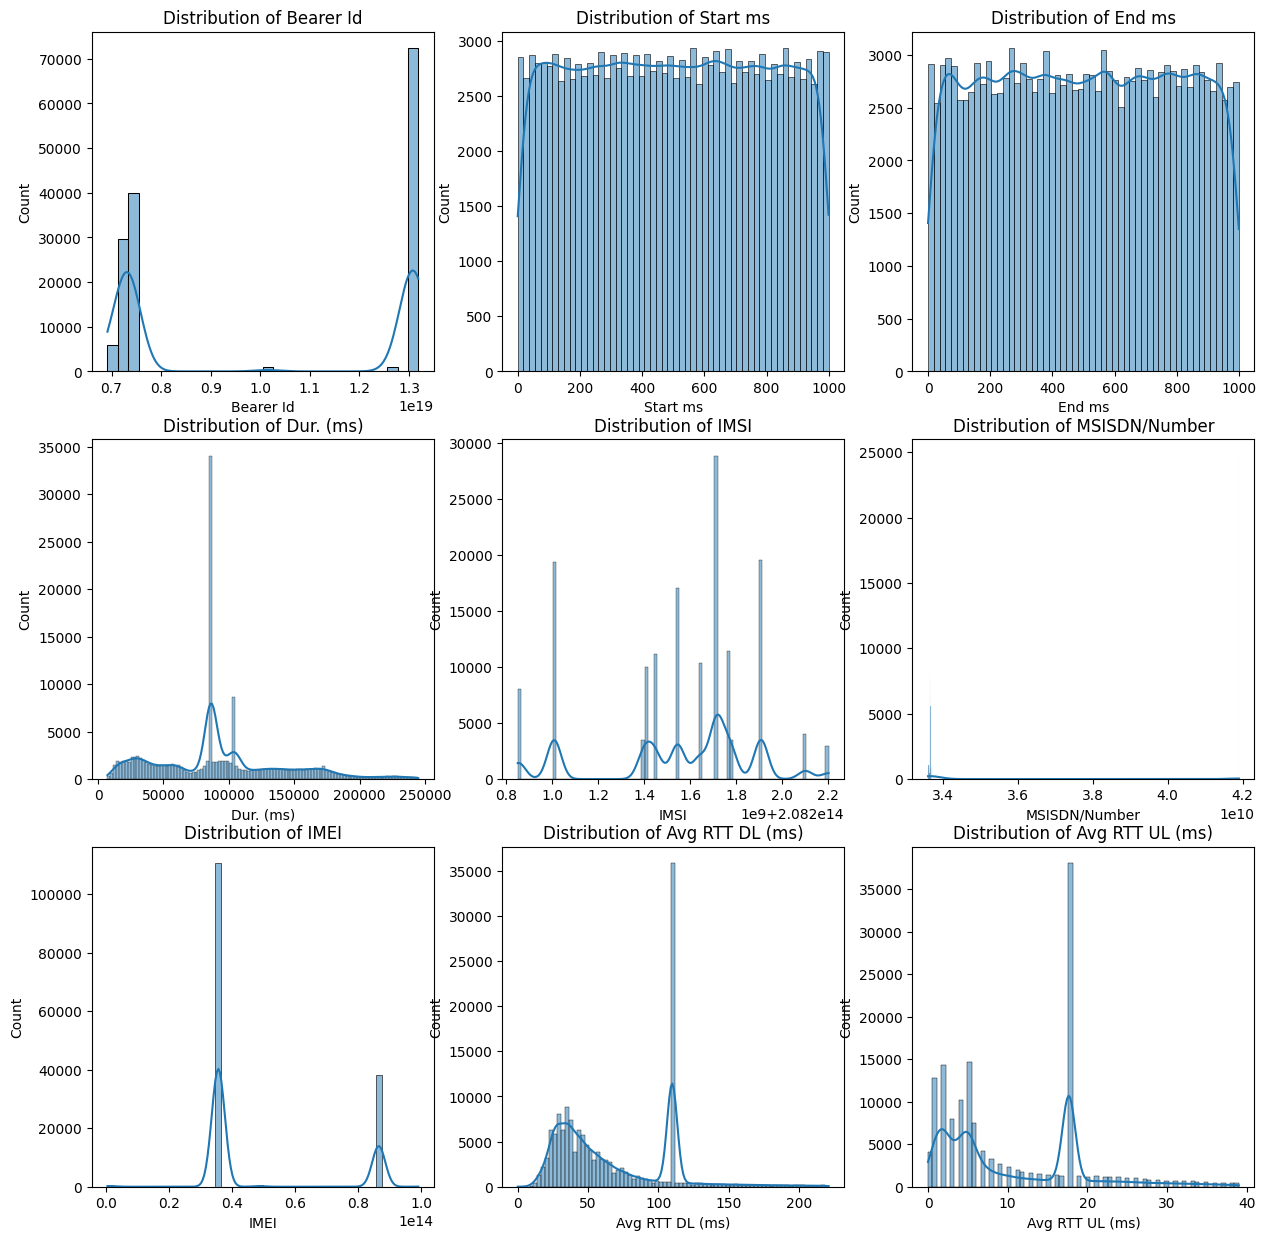

In [125]:
# Select numeric features
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Determine the number of columns and rows needed for the subplots
n_cols = 3
n_rows = 3 #int(np.ceil(len(numeric_columns) / n_cols))

# Create subplots
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

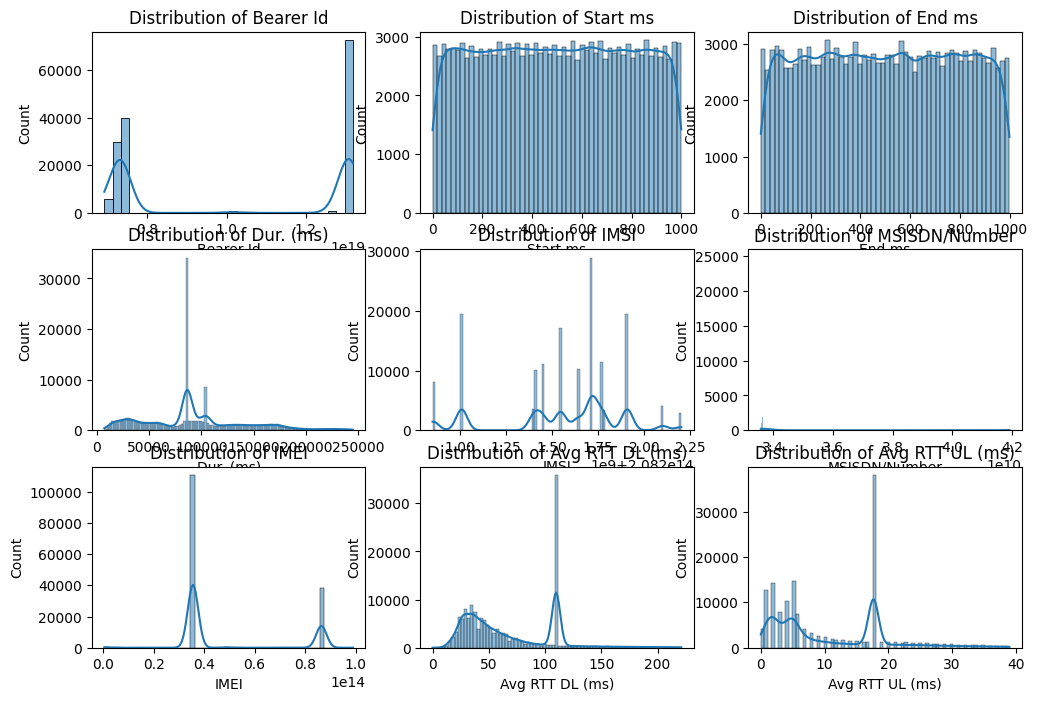

In [123]:
# 7. Graphical Univariate Analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

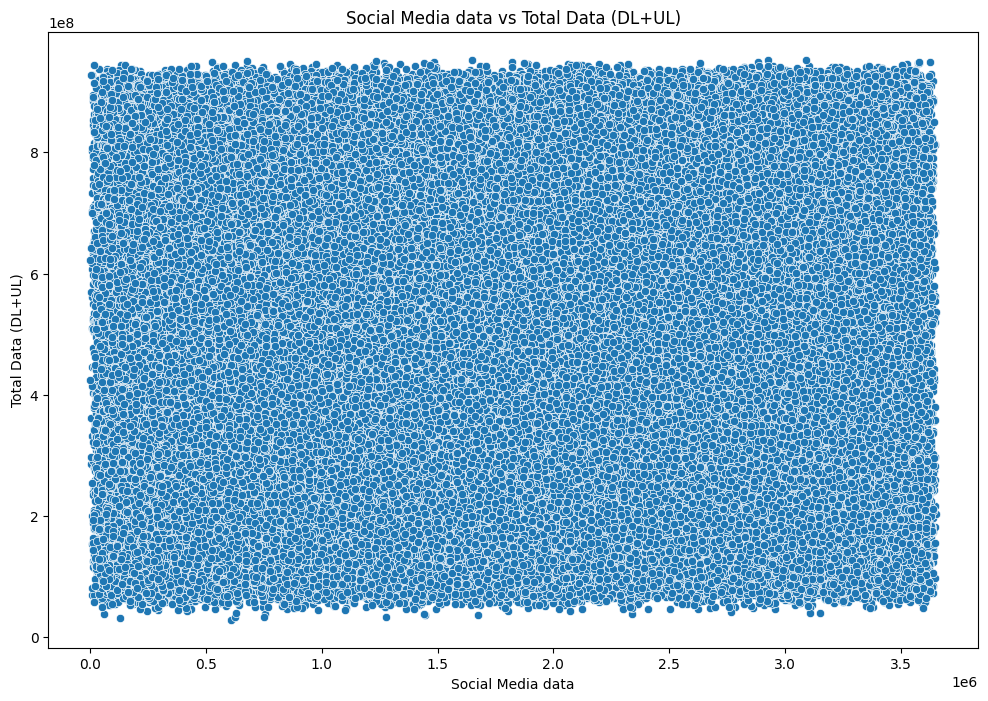

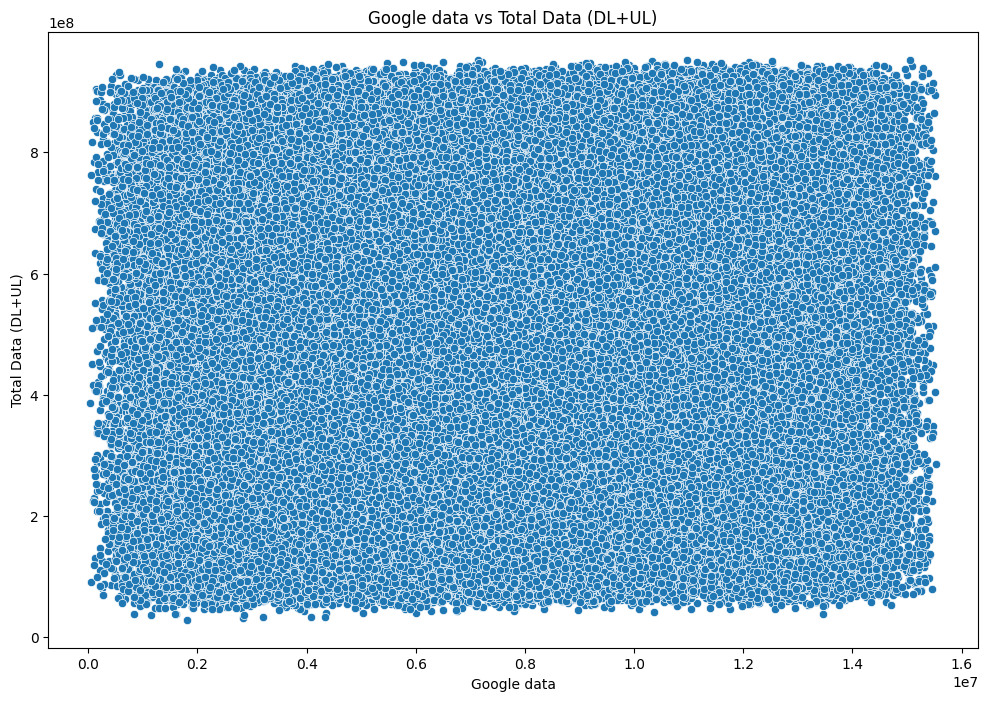

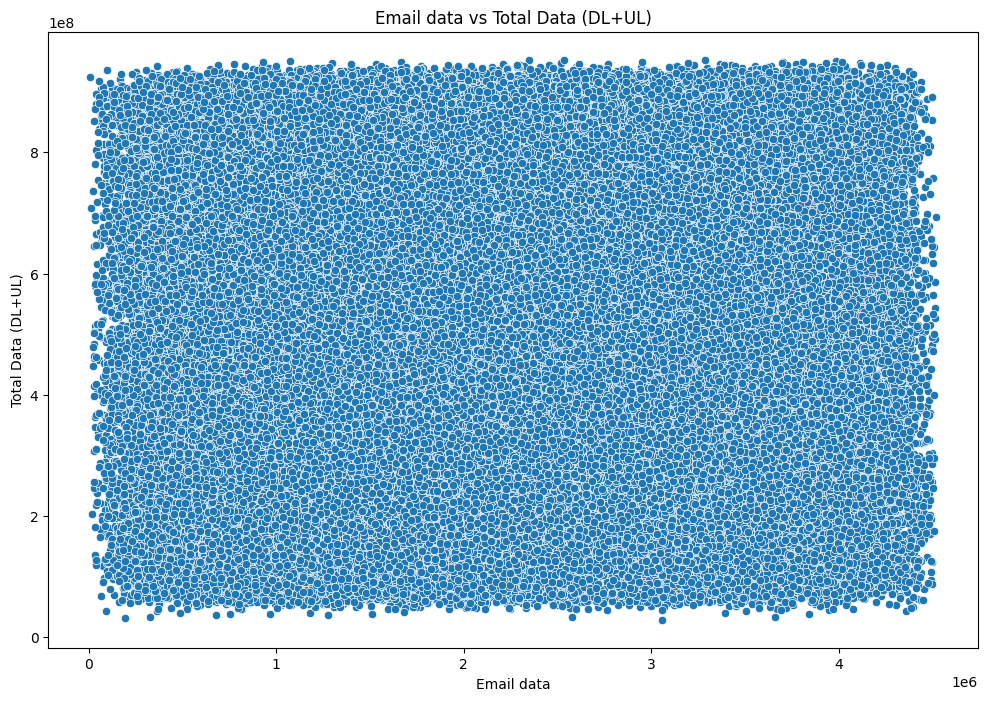

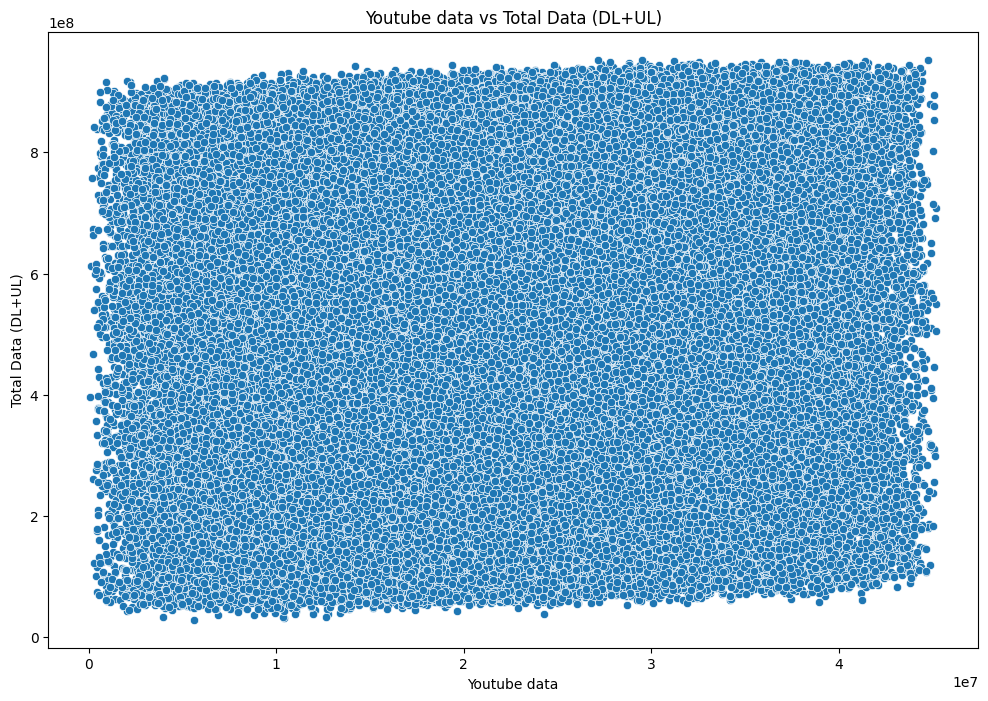

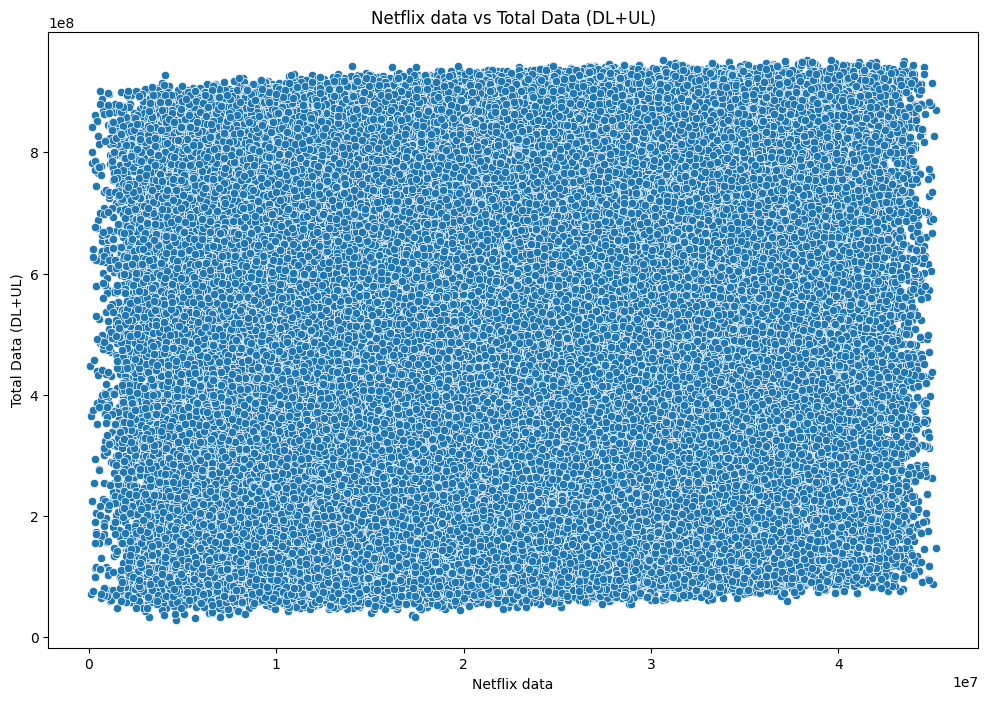

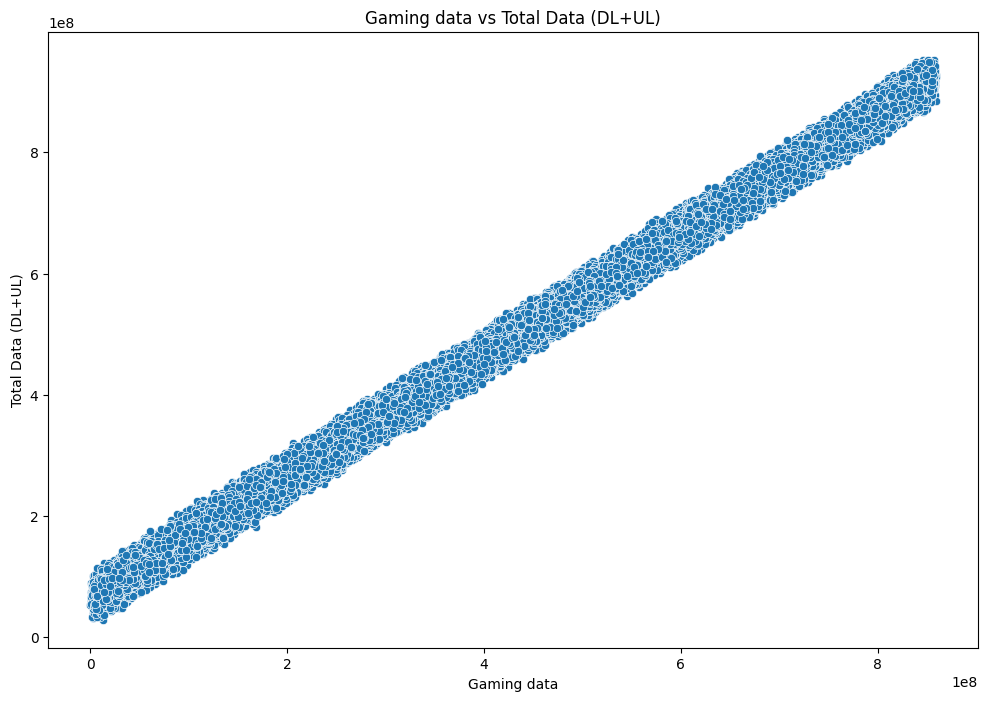

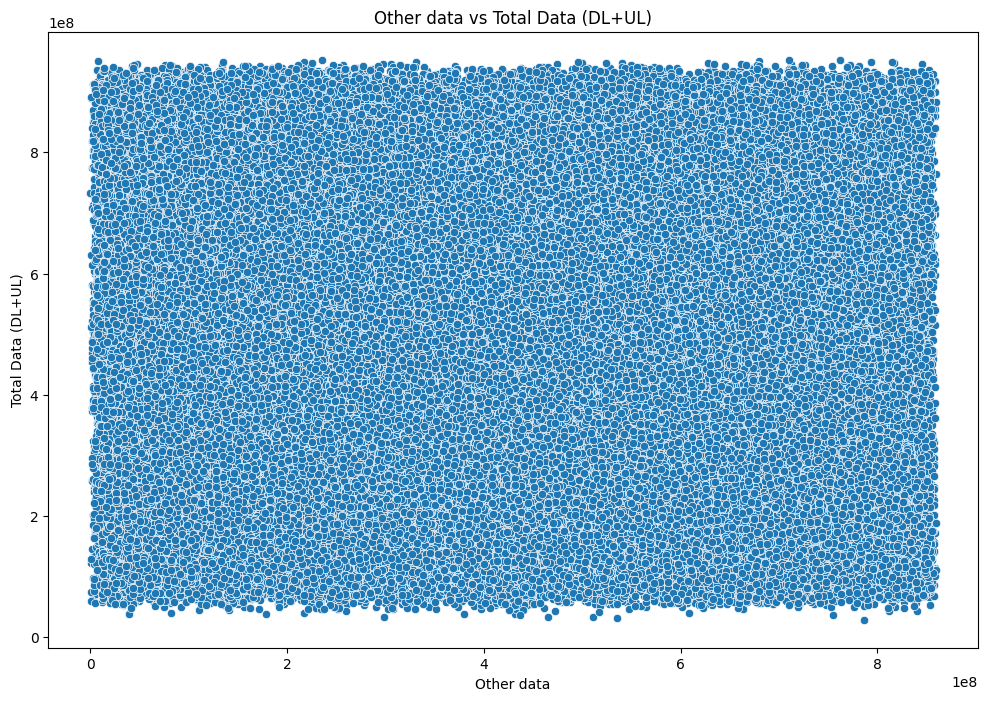

In [117]:
# Explore the relationship between each application and total DL+UL data
applications = ['Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']
for app in applications:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=df[app], y=df['Total Data (DL+UL)'])
    plt.title(f'{app} vs Total Data (DL+UL)')
    plt.xlabel(app)
    plt.ylabel('Total Data (DL+UL)')
    plt.show()


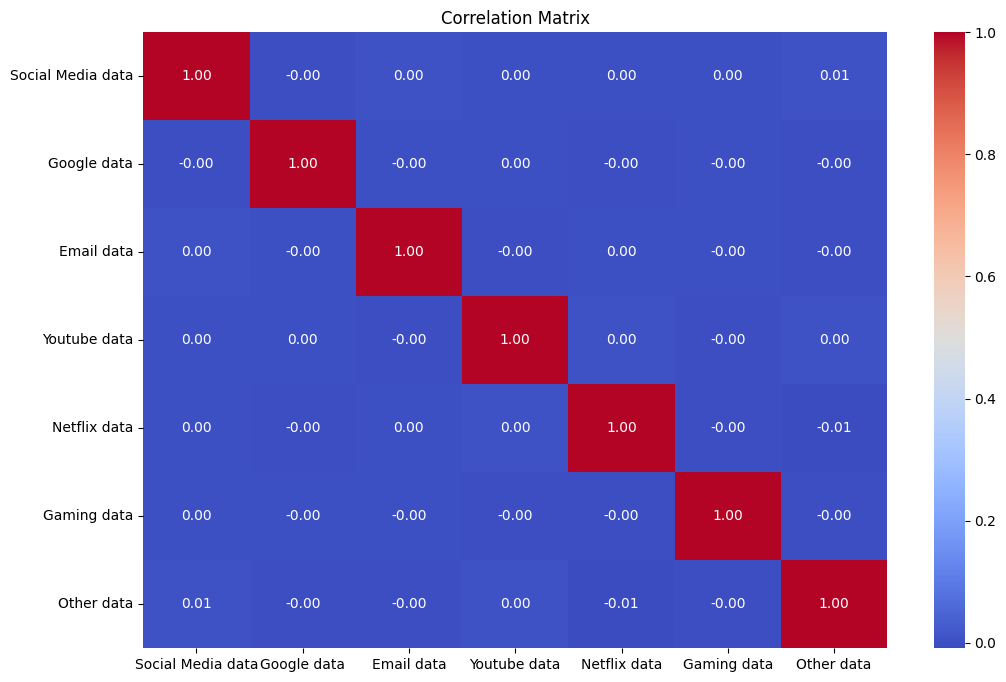


Correlation Matrix:
                    Social Media data  Google data  Email data  Youtube data  \
Social Media data           1.000000    -0.001708    0.004032      0.000548   
Google data                -0.001708     1.000000   -0.000412      0.002277   
Email data                  0.004032    -0.000412    1.000000     -0.002919   
Youtube data                0.000548     0.002277   -0.002919      1.000000   
Netflix data                0.001013    -0.001902    0.001029      0.002882   
Gaming data                 0.001082    -0.000994   -0.000644     -0.002999   
Other data                  0.006065    -0.001727   -0.001299      0.002969   

                   Netflix data  Gaming data  Other data  
Social Media data      0.001013     0.001082    0.006065  
Google data           -0.001902    -0.000994   -0.001727  
Email data             0.001029    -0.000644   -0.001299  
Youtube data           0.002882    -0.002999    0.002969  
Netflix data           1.000000    -0.003109   -0.

In [118]:
# Compute and plot correlation matrix
correlation_matrix = df[['Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Matrix:\n", correlation_matrix)



PCA Explained Variance Ratio:
 [1.00000000e+00 5.85847311e-11]

PCA Components:
 [[ 1.00000000e+00  2.95614499e-19 -1.21395541e-19 -5.86031777e-17
   1.68987928e-12  2.13139701e-12  1.27120401e-06  9.46286574e-19
   5.23201541e-19  3.64991763e-16  2.11696420e-17 -7.22478571e-14
  -3.98979287e-15 -1.23348297e-19  5.45989456e-20  2.02067814e-20
   1.82447132e-20 -1.97891769e-20  7.25011448e-21  2.50367619e-22
   8.50039260e-23  1.61179541e-13  9.51032124e-15  2.33564795e-14
   1.69984114e-14 -5.86004215e-14 -1.91100045e-18 -8.73504220e-19
   8.91321033e-19  1.56888877e-20  2.87656698e-18  3.45379737e-19
   4.68996131e-17  4.77519106e-17 -3.02298000e-16 -7.38789360e-18
  -7.92518433e-16  9.28167913e-16  9.40223344e-16 -3.05733798e-17
  -5.71975845e-15 -1.54239654e-15 -1.44562503e-15 -8.18649152e-15
   4.10669013e-14 -5.30871755e-15  7.92938661e-14 -3.69222310e-15
  -1.65398845e-14  3.37469247e-14 -5.86031777e-17  1.72070402e-14
  -6.58713885e-22 -3.09685894e-16  1.35649480e-16  9.0964996

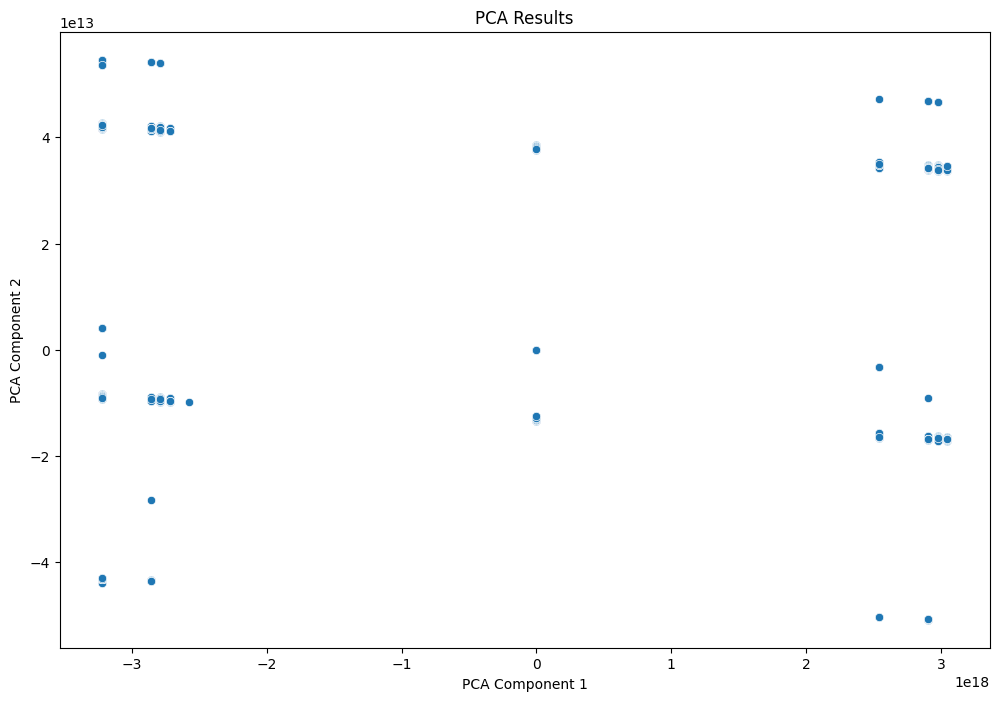

In [119]:
# Perform PCA
features = df.select_dtypes(include=[np.number])

# Fill NaNs with the mean of each column
features_filled = features.fillna(features.mean())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

print("\nPCA Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("\nPCA Components:\n", pca.components_)

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.title('PCA Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Task-1.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load your dataset
df = pd.read_csv('Week1_challenge_data_source(CSV).csv')

In [3]:
# Describe all relevant variables and their associated data types (slide)
def describe_variables(df):
    description = df.dtypes
    print("Data Types of Variables:\n", description)
    return description

In [4]:
# Segment users into the top five decile classes based on total duration for all sessions
def segment_users(df, duration_column):
    df['Decile'] = pd.qcut(df[duration_column], 10, labels=False) + 1
    top_five_deciles = df[df['Decile'] >= 6]
    top_five_summary = top_five_deciles.groupby('Decile')[['DL', 'UL']].sum()
    top_five_summary['Total_Data'] = top_five_summary['DL'] + top_five_summary['UL']
    print("Top Five Decile Classes:\n", top_five_summary)
    return top_five_summary

In [5]:
# Analyze basic metrics in the dataset (mean, median, etc.)
def basic_metrics(df):
    metrics = df.describe()
    print("Basic Metrics:\n", metrics)
    return metrics

In [6]:
# Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable
def univariate_analysis(df):
    dispersion_metrics = df.var()  # Variance as a measure of dispersion
    print("Dispersion Metrics:\n", dispersion_metrics)
    return dispersion_metrics

In [7]:
# Graphical Univariate Analysis - Plotting suitable graphs
def graphical_univariate_analysis(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Graphical Univariate Analysis for {column_name}')
    plt.show()

In [8]:
# Bivariate Analysis - Explore the relationship between each application & the total DL+UL data
def bivariate_analysis(df, column_name):
    df['Total_Data'] = df['DL'] + df['UL']
    sns.scatterplot(data=df, x=column_name, y='Total_Data')
    plt.title(f'Bivariate Analysis: {column_name} vs Total Data')
    plt.show()

In [9]:
# Correlation Analysis - Compute a correlation matrix
def correlation_analysis(df, columns):
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    print("Correlation Matrix:\n", corr_matrix)
    return corr_matrix

In [10]:
# Dimensionality Reduction using PCA
def dimensionality_reduction(df, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df)
    explained_variance = pca.explained_variance_ratio_
    print(f'Explained Variance Ratios: {explained_variance}')
    print(f'Cumulative Explained Variance: {np.cumsum(explained_variance)}')
    return pca_result

In [11]:
# Example usage:
# df = pd.read_csv('your_data.csv')
# describe_variables(df)
# top_five_summary = segment_users(df, 'Total_Duration')
# basic_metrics = basic_metrics(df)
# dispersion_metrics = univariate_analysis(df)
# graphical_univariate_analysis(df, 'Total_Duration')
# bivariate_analysis(df, 'Some_App_Column')
# correlation_matrix = correlation_analysis(df, ['Social_Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other'])
# pca_result = dimensionality_reduction(df)


In [ ]:
# 8. Bivariate Analysis
plt.figure(figsize=(15, 10))
for i, app in enumerate(['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other'], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[app], y=df['DL'] + df['UL'])
    plt.title(f'{app} vs Total DL+UL')
plt.tight_layout()
plt.show()

# 9. Correlation Analysis
correlation_matrix = df[['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']].corr()
print(correlation_matrix)

# 10. Dimensionality Reduction
features = df[['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_features)

# Explained variance
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Interpretation
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['decile_class'], cmap='viridis')
plt.colorbar(label='Decile Class')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation of PCA results:
# 1. The first principal component explains X% of the variance, and the second principal component explains Y%.
# 2. Principal components highlight the direction of maximum variance in the data.
# 3. Components can be used to identify patterns or clusters in the dataset.
# 4. Visualization helps to understand the distribution and grouping of the data based on decile